# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

# **Aprendizaje Supervisado**

## Entregable: PARTE 1

## GRUPO Nº24

## INTEGRANTES:
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio
   - Diana Fonnegra
   ------

# DiploDatos Kaggle Competition

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

# Análisis Exploratorio de Datos (EDA)


### Importación de modulos

In [142]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import norm

from sklearn.experimental import enable_iterative_imputer

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, \
    LeaveOneOut, LeavePOut,train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import recall_score, accuracy_score, precision_score, \
    f1_score, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, \
    classification_report, ConfusionMatrixDisplay, accuracy_score, ConfusionMatrixDisplay, \
    classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

import missingno as msno

sns.set_context('talk')
warnings.filterwarnings("ignore")

### Lectura del dataset

In [143]:
# Carga de los datasets (train y test)
train_titanic = pd.read_csv('CK_train.csv')
test_titanic = pd.read_csv('CK_test.csv')
train_titanic.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0


### Información de los atributos y tipos de datos asociados

In [144]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


### Etiqueta del grupo de datos a utilizar para desarrollar el modelo

In [145]:
# Extracción de las etiquetas, resguardo en una variable espeficica
y = train_titanic['Transported']

#### g_dataset
 - El ***g_dataset*** es la unión de ambos grupos de datos (entrenamiento y prueba), eliminando previamente la etiqueta en el set etrenamiento
 - Nos permitira tener una visión global de todo el espacio de los atributos
 - Sobre el mismo realizaremos las imputaciones de datos faltantes

In [146]:
g_dataset = train_titanic.copy()
g_dataset.drop(['Transported'],axis=1, inplace=True)
g_dataset = g_dataset.append(test_titanic)

### Resumen de la dimensionalidad de los conjuntos de datos

In [147]:
# dimensiones de cada grupo de datos
train_titanic.shape, test_titanic.shape, g_dataset.shape

((7823, 14), (870, 13), (8693, 13))

### Revisión de los atributos

#### - Analisis de la estructura del  dataset

In [148]:
g_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 869
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   int64  
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 950.8+ KB


In [149]:
g_dataset.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking


### Evaluación y relevamiento inicial de Nulos, Nan (g_dataset)

#### Conteo

In [150]:
# Conteo de null and nan (Pandas cuenta Null y Nan de igual modo)
g_dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

#### Frecuencia relativa

In [151]:
# Tabla null-nan [%]
g_dataset.isnull().sum()/len(g_dataset)*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
dtype: float64

### Distribución de los datos faltantes por atributos (g_dataset).
 - Esta información nos será de utilidad durante el proceso de imputaciones

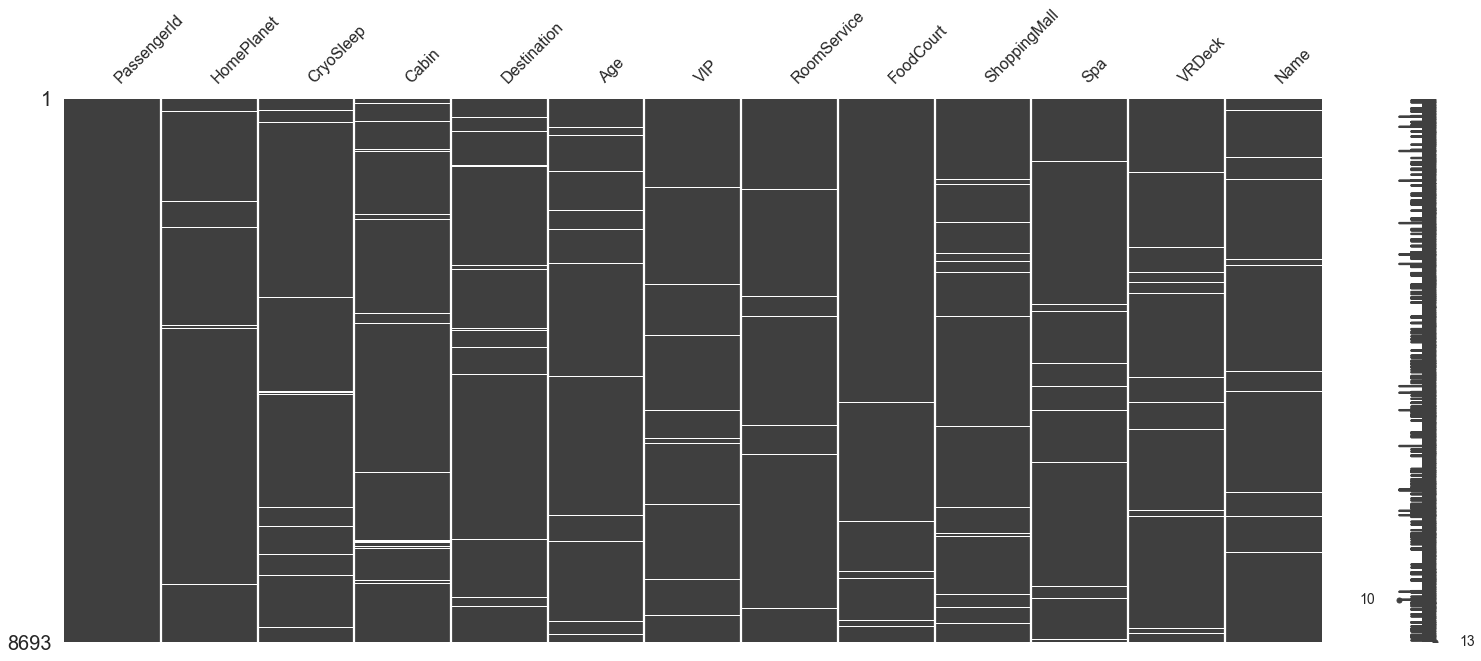

In [152]:
msno.matrix(g_dataset);

#### Consideraciones:
- Se observan datos faltantes en ***todas de las variables***, exepto para el atributo PassengerId.
- El porcentaje es del orden del 2 %.
- No se identifican conglomerados ni bloques con pérdidas masivas de información.
- A partir de la inspección del gráfico proponemos la existencia de uniformidad aletoria en la distribución de datos faltantes para cada variable.

### Anális de correlación y ditribución de datos en el set de entrenaminto
 - Esta información nos permite comprende la interelación entre las distintas variables

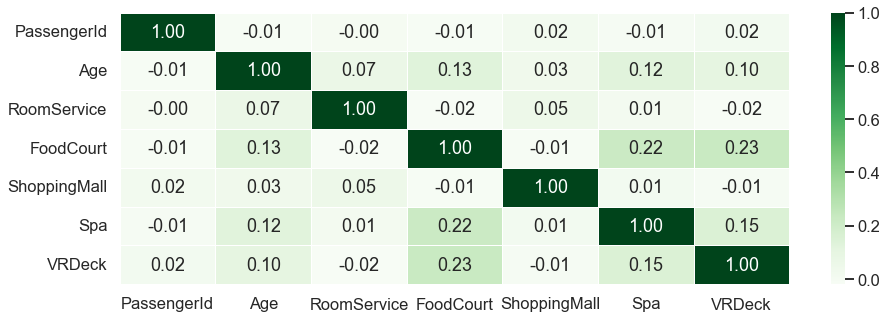

In [153]:
f,ax = plt.subplots(figsize=(15, 5))
sns.heatmap(g_dataset.corr(), annot=True, linewidths=0.5,cmap="Greens", fmt= '.2f',ax=ax)
plt.show()

### En este primer análisis de correlacián ***no se observa una asociación fuerte*** entre las variables evaluadas

### Análisis de las principales variables categóricas

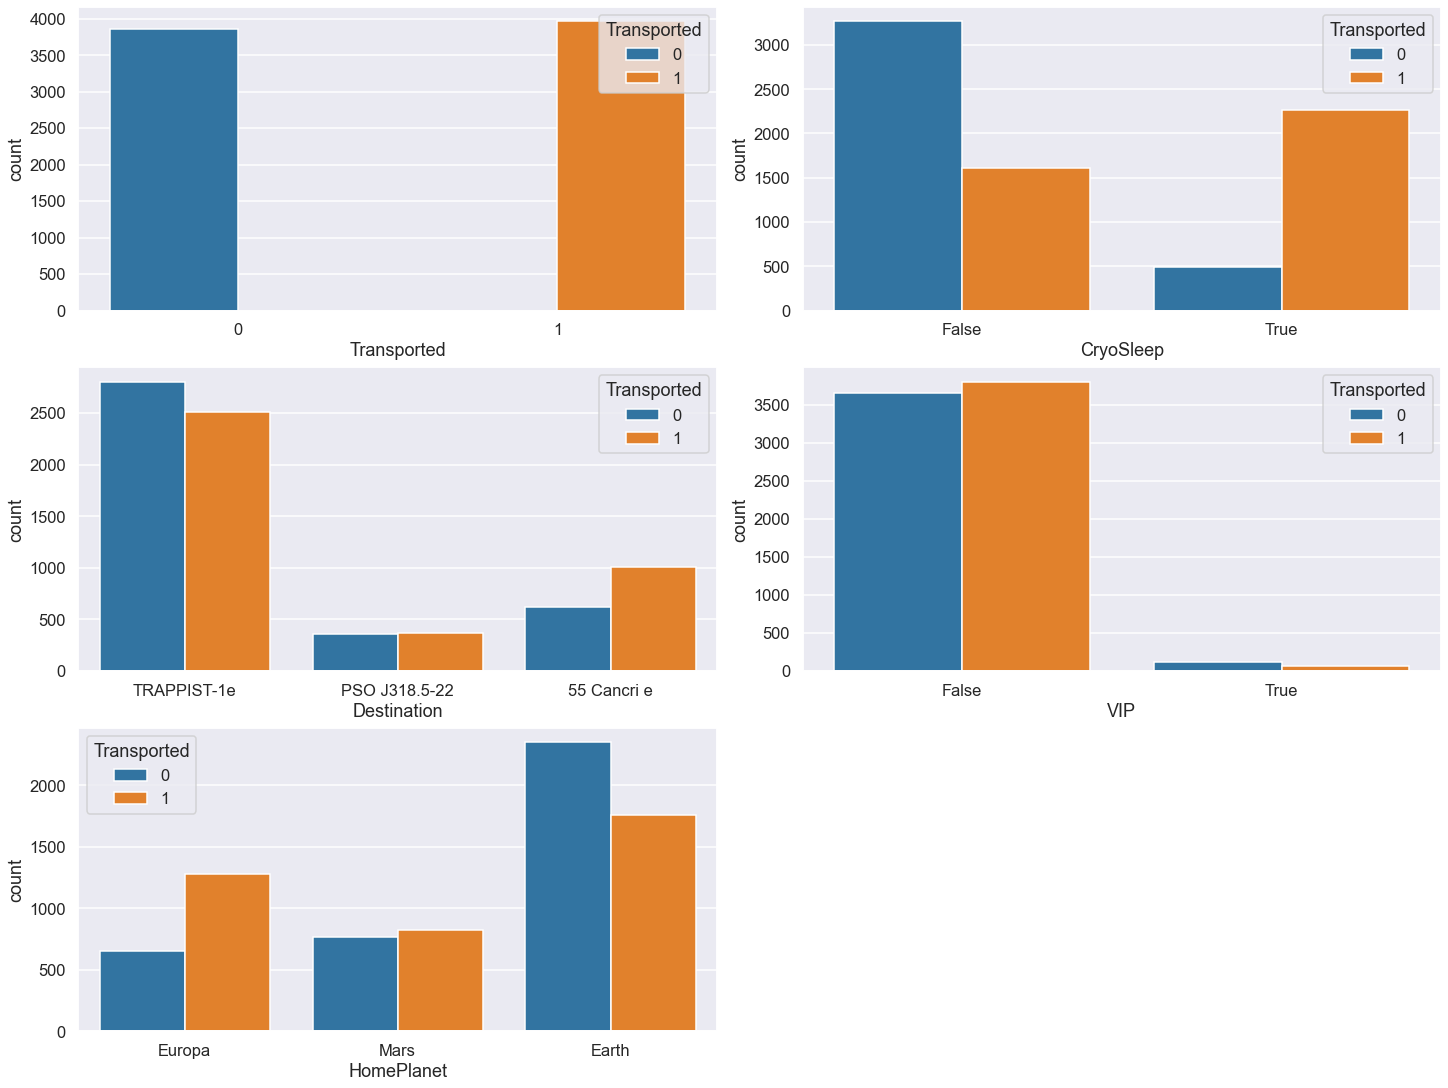

In [154]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,15),constrained_layout=True)

plt.subplot(321)
sns.countplot(x='Transported', data=train_titanic ,hue='Transported');

plt.subplot(322)
sns.countplot(x = "CryoSleep", data = train_titanic, hue = "Transported")

plt.subplot(323)
g=sns.countplot(x = "Destination", data = train_titanic, hue = "Transported")

plt.subplot(324)
sns.countplot(x = "VIP", data = train_titanic, hue = "Transported")

plt.subplot(325)
sns.countplot(x = "HomePlanet", data = train_titanic, hue = "Transported");
plt.close(16)

#### Los graficos previos reflejan que:
 - Se observa que aproximadamente ***la mitad de los pasajeros fueron transportados exitosamente*** a otra dimensión.
 - Existen relaciones particulares entre cada variable presentada y la etiqueta "Transported"
 - Las distribuciones varian para cada variable estudiada.
 - Todos los atributos son relevantes y con impacto directo en la predicción

#### Analisis de las variables numericas asociadas con los gastos realizados por los pasajeros en distintos servicios durante el viaje

In [155]:
train_titanic.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [156]:
#RoomService
RoomService_pos= train_titanic[train_titanic["Transported"]==1]["RoomService"]
RoomService_neg= train_titanic[train_titanic["Transported"]==0]["RoomService"]
#FoodCourt
FoodCourt_pos= train_titanic[train_titanic["Transported"]==1]["FoodCourt"]
FoodCourt_neg= train_titanic[train_titanic["Transported"]==0]["FoodCourt"]
#ShoppingMall
ShoppingMall_pos= train_titanic[train_titanic["Transported"]==1]["ShoppingMall"]
ShoppingMall_neg= train_titanic[train_titanic["Transported"]==0]["ShoppingMall"]
#Spa
Spa_pos= train_titanic[train_titanic["Transported"]==1]["Spa"]
Spa_neg= train_titanic[train_titanic["Transported"]==0]["Spa"]
#VRDeck
VRDeck_pos= train_titanic[train_titanic["Transported"]==1]["VRDeck"]
VRDeck_neg= train_titanic[train_titanic["Transported"]==0]["VRDeck"]

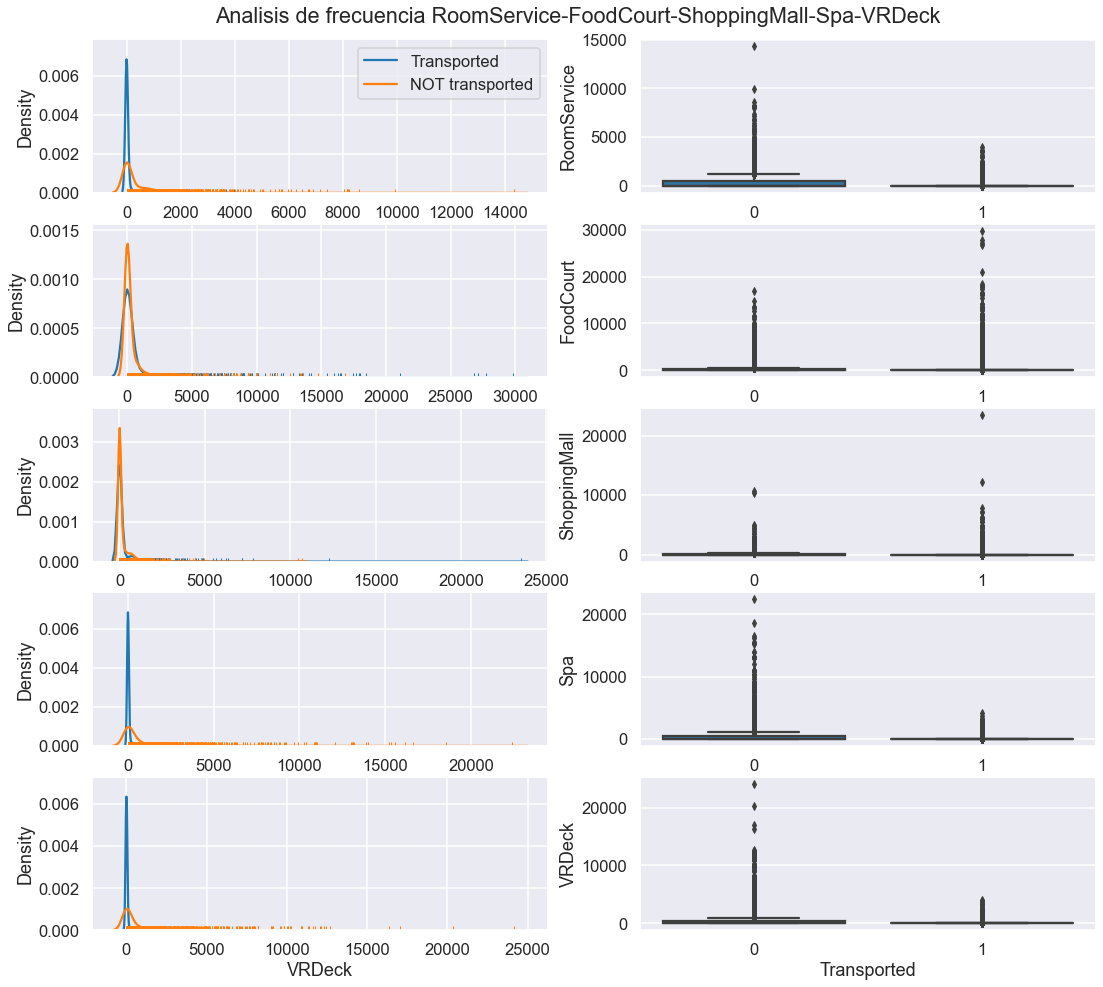

In [157]:
fig2 = plt.figure(figsize=(18,15),constrained_layout=True)

fig2.suptitle("Analisis de frecuencia RoomService-FoodCourt-ShoppingMall-Spa-VRDeck")
plt.subplot(5,2,1)
sns.distplot(RoomService_pos, hist=False, rug=True, label='Transported')
sns.distplot(RoomService_neg, hist=False, rug=True, label='NOT transported')
plt.legend()
plt.subplot(5,2,2)
sns.boxplot(y="RoomService", data=train_titanic, x="Transported")
#-----------------------

plt.subplot(5,2,3)
sns.distplot(FoodCourt_pos, hist=False, rug=True)
sns.distplot(FoodCourt_neg, hist=False, rug=True)
plt.subplot(5,2,4)
sns.boxplot(y="FoodCourt", data=train_titanic, x="Transported")
#-----------------------

plt.subplot(5,2,5)
sns.distplot(ShoppingMall_pos, hist=False, rug=True)
sns.distplot(ShoppingMall_neg, hist=False, rug=True)
plt.subplot(5,2,6)
sns.boxplot(y="ShoppingMall", data=train_titanic, x="Transported")
#-----------------------

plt.subplot(5,2,7)
sns.distplot(Spa_pos, hist=False, rug=True)
sns.distplot(Spa_neg, hist=False, rug=True)
plt.subplot(5,2,8)
sns.boxplot(y="Spa", data=train_titanic, x="Transported")
#-----------------------
plt.subplot(5,2,9)
sns.distplot(VRDeck_pos, hist=False, rug=True)
sns.distplot(VRDeck_neg, hist=False, rug=True)
plt.subplot(5,2,10)
sns.boxplot(y="VRDeck", data=train_titanic, x="Transported")
plt.subplots_adjust(top=0.95)
plt.show()

###
 - Las variables relacionadas con los gastos por consumisiones en el viaje presentan importantes outliers.
 - Este aspecto es marcado principalmente en los pasajeros no transportados.
 - Para gastos de RoomService, VRDeck y SPA los pasajeros transportados presentan valores mas concetrados con un rango menor de outliers


#### Age

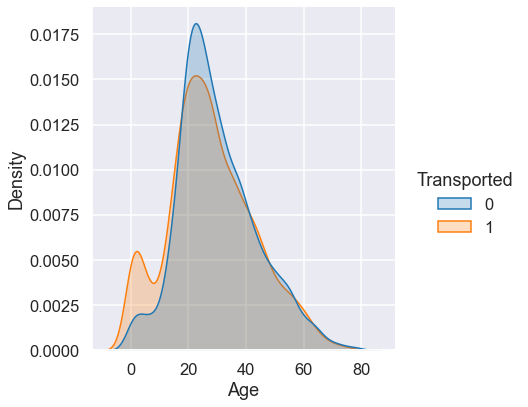

In [158]:
sns.displot(data=train_titanic, x='Age' ,hue='Transported', kind='kde', fill=True, height=6);

### La distribucion de frecuencia por edad presenta las siguientes observaciones:
 - Se identifican distribuciones bimodales, en el rango de los niños y adultos centrados entre los 25 y 35 años.
 - Para el caso de los niños la proporción de los transportados es mayor a los no transportados
 - En el caso de rango de adultos mencioando previamente, es algo mayor la proporción de los pasajeros no transportados frente a los transportados.

 -----------FINAL PARTE 1 de 5--------------